Angel Mazariegos 19000522 - Sección V

### Ciencia de Datos en Python

# Proyecto #1

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


### **2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).**

In [172]:
dataset = np.load('proyecto_training_data.npy')
entrenamiento = int(len(dataset)*0.8)

dataset_entrenamiento = dataset[:entrenamiento]
dataset_validacion = dataset[entrenamiento:]

### **3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas)**
- **Media**

In [26]:
media = np.nanmean(dataset_entrenamiento, axis=0)
print("Media de cada columna:")
print(media)

Media de cada columna:
[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


 - **Valor maximo**

In [27]:
valor_max = np.nanmax(dataset_entrenamiento, axis=0)
valor_max

array([7.550e+05, 1.000e+01, 3.228e+03, 1.400e+01, 2.010e+03, 3.130e+02])

- **Valor minimo**

In [28]:
valor_min = np.nanmin(dataset_entrenamiento, axis=0)
valor_min

array([3.490e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.875e+03, 2.100e+01])

In [29]:
!git add Proyecto_19000522.ipynb
!git commit -m "Terminando hasta gradiente de error"
!git push --set-upstream origin master

[master 8a491d0] Terminando hasta gradiente de error
 1 file changed, 22 insertions(+), 95 deletions(-)
branch 'master' set up to track 'origin/master'.


To https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
   edfa84a..8a491d0  master -> master


- **Rango (peak to peak)**

In [30]:
rango = valor_max - valor_min
print(rango)

[7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


- **Desviacion estandar**

In [31]:
desviacion = np.nanstd(dataset_entrenamiento, axis=0, ddof=1)

In [32]:
desviacion

array([7.88156979e+04, 1.37802523e+00, 3.73780374e+02, 1.60914071e+00,
       2.99517066e+01, 2.34781608e+01])

### **4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.**

In [33]:
d = { 'SalePrice': dataset_entrenamiento[:, 0],
      'OverallQual': dataset_entrenamiento[:, 1],
      '1stFlrSF': dataset_entrenamiento[:, 2],
      'TotRmsAbvGrd': dataset_entrenamiento[:, 3],
      'YearBuilt': dataset_entrenamiento[:, 4],
      'LotFrontage': dataset_entrenamiento[:, 5]
     }

df = pd.DataFrame(d)
df



,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


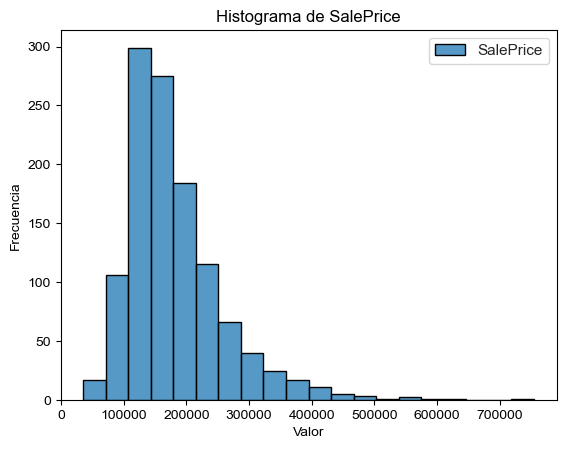

In [34]:
sns.histplot(df["SalePrice"], kde=False, bins=20, label='SalePrice')

sns.set(style="whitegrid")
plt.title('Histograma de SalePrice')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

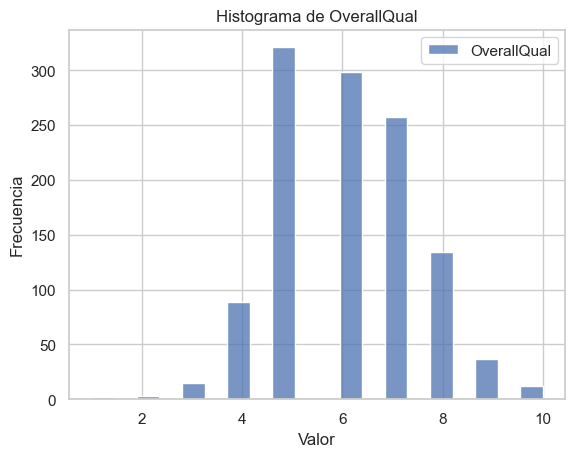

In [35]:
sns.histplot(df["OverallQual"], kde=False, bins=20, label='OverallQual')

sns.set(style="whitegrid")
plt.title('Histograma de OverallQual')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

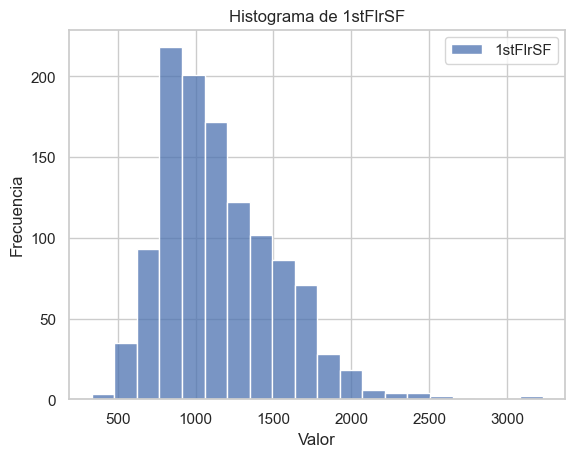

In [36]:
sns.histplot(df["1stFlrSF"], kde=False, bins=20, label='1stFlrSF')

sns.set(style="whitegrid")
plt.title('Histograma de 1stFlrSF')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

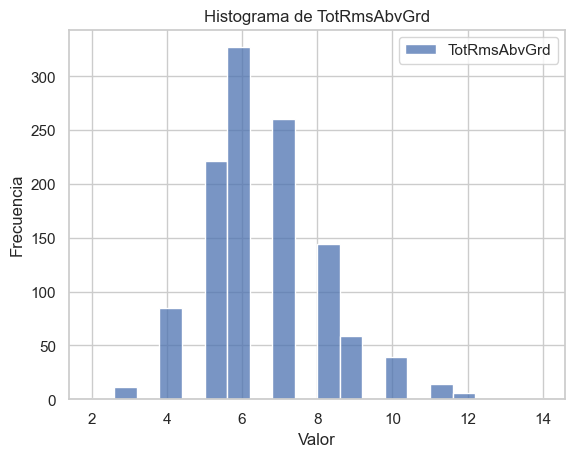

In [37]:
sns.histplot(df["TotRmsAbvGrd"], kde=False, bins=20, label='TotRmsAbvGrd')

sns.set(style="whitegrid")
plt.title('Histograma de TotRmsAbvGrd')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

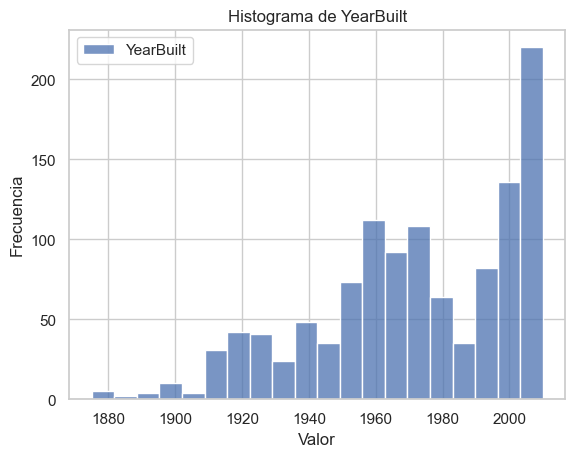

In [38]:
sns.histplot(df["YearBuilt"], kde=False, bins=20, label='YearBuilt')

sns.set(style="whitegrid")
plt.title('Histograma de YearBuilt')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

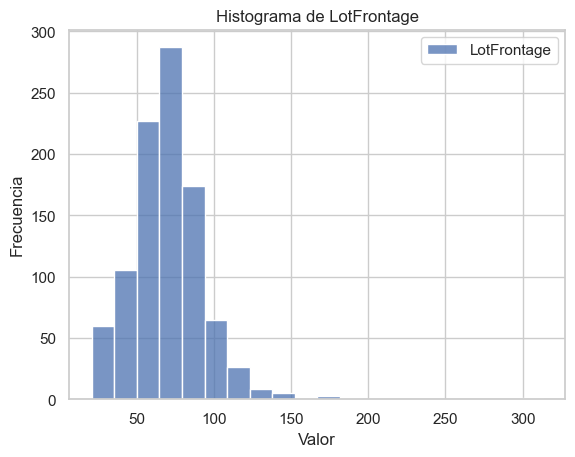

In [39]:
sns.histplot(df["LotFrontage"], kde=False, bins=20, label='LotFrontage')

sns.set(style="whitegrid")
plt.title('Histograma de LotFrontage')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### **5. Para cada variable independiente x :**
- **Calcular el coeficiente de correlación entre x y y.**
- **Graficar x vs y (scatterplot) usando matplotlib.**
- **Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.**

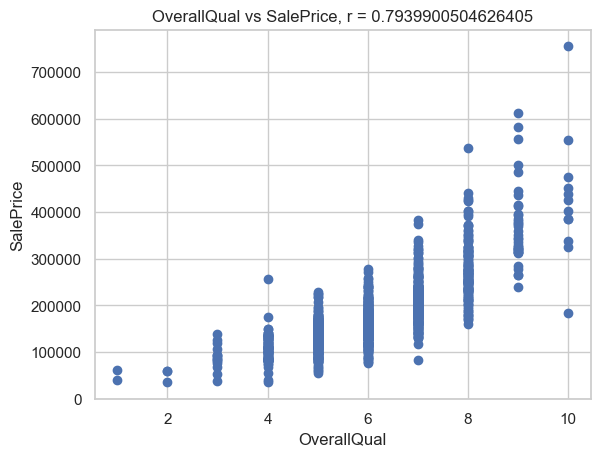

In [40]:
coef_correlacion1 = df['OverallQual'].corr(df['SalePrice'])

plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'OverallQual vs SalePrice, r = {coef_correlacion1}')
plt.grid(True)
plt.show()

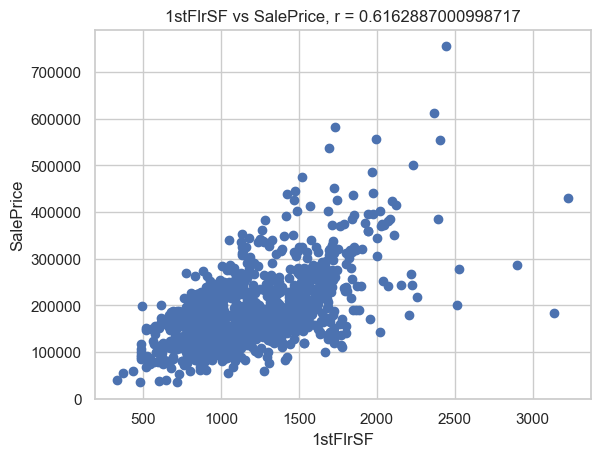

In [41]:
coef_correlacion2 = df['1stFlrSF'].corr(df['SalePrice'])

plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'1stFlrSF vs SalePrice, r = {coef_correlacion2}')
plt.grid(True)
plt.show()

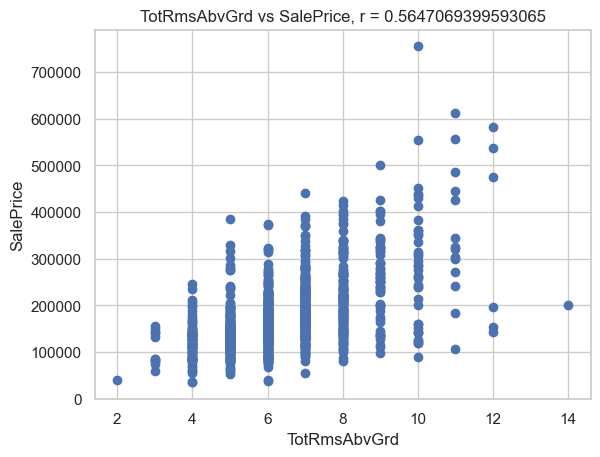

In [42]:
coef_correlacion3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])

plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'TotRmsAbvGrd vs SalePrice, r = {coef_correlacion3}')
plt.grid(True)
plt.show()

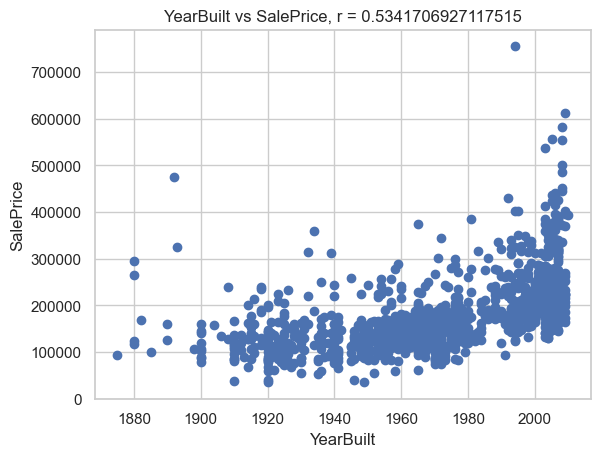

In [43]:
coef_correlacion4 = df['YearBuilt'].corr(df['SalePrice'])

plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'YearBuilt vs SalePrice, r = {coef_correlacion4}')
plt.grid(True)
plt.show()

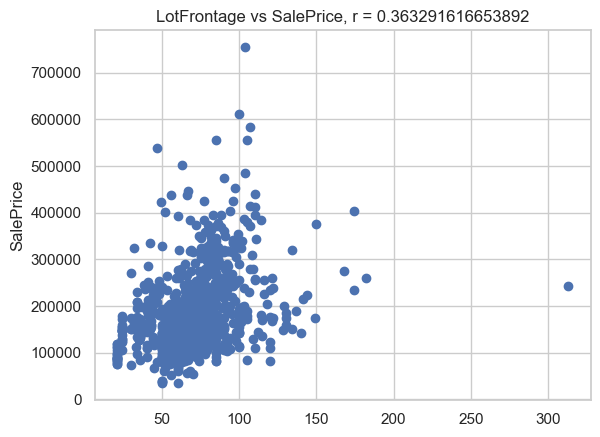

In [44]:
coef_correlacion5 = df['LotFrontage'].corr(df['SalePrice'])

plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('')
plt.ylabel('SalePrice')
plt.title(f'LotFrontage vs SalePrice, r = {coef_correlacion5}')
plt.grid(True)
plt.show()

- **Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
  con más potencial predictivo es decir las 2 variables que presentan mayor correlación
  entre dicha variable y la variable dependiente.**
  
Los valores con mayor coeficiente de correlación:
  - **OverallQual vs SalePrice = 0.79399**
  - **1stFlrSF vs SalePrice = 0.616289**

### **6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗ x.**



In [166]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Crear una matriz de 2 columnas, la primera columna corresponde al 
    # vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.
    X = np.column_stack((x, np.ones(len(x))))
    
    # Inicializar los paráametros del modelo en un vector beta0 y beta1, esto es equivalente a empezar
    # el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar
    # una que aproxime de buena manera los datos x, y.
    beta = np.zeros(2)
    #print (f'valor de beta = {X}')
    errores = []
    
    # Iteración sobre cada epoch
    for epoch in range(1, epochs+1):
        # Calcular la predicción (y_hat) usando los parámetros actuales
        y_hat = np.dot(X, beta)
        
        # Calcular el error o costo
        error = (np.mean((y_hat - y) ** 2))/2
        errores.append(error)
        
        #Calcular el gradiente del error respecto de cada parametro
        gradiente_beta1 = np.mean((y_hat - y) * X[:, 0])
        gradiente_beta0 = np.mean(y_hat - y)
        
        # Actualizar los parámetros del modelo usando gradiente descendente
        beta[0] -= alpha * gradiente_beta1
        beta[1] -= alpha * gradiente_beta0
        
        
        # Imprimir el error si es necesario
        if epoch % imprimir_error_cada == 0:
             print(f"Iteración {epoch}: Error = {error}")
        
    return beta, y_hat

# Ejemplo de uso
epochs = 10000
imprimir_error_cada = 1000

# Para OverallQual alpha = 0.023 y epochs = 6000 
# para 1stFlrSF alpha = 0.000000001 y epochs = 10000
alpha = 0.00000001

---

### Entrenamiento usando **1stFlrSF vs SalePrice**

Utilizando modelo entrenado:

In [167]:
beta_final_1stFlrSF, prediccion_1stFlrSF = entrenar_regresion_lineal(dataset_entrenamiento[:,2], dataset_entrenamiento[:,0], 10000, 1000, 0.00000001)
print("Parámetros finales del modelo:", beta_final_1stFlrSF)

Iteración 1000: Error = 1968093004.5179553
Iteración 2000: Error = 1968092922.3414917
Iteración 3000: Error = 1968092840.167335
Iteración 4000: Error = 1968092757.9933338
Iteración 5000: Error = 1968092675.8194873
Iteración 6000: Error = 1968092593.6457963
Iteración 7000: Error = 1968092511.4722612
Iteración 8000: Error = 1968092429.2988808
Iteración 9000: Error = 1968092347.1256564
Iteración 10000: Error = 1968092264.952587
Parámetros finales del modelo: [153.6968401    0.40701334]


Utilizando Scikit-Learn:

In [170]:
nueva = (dataset_entrenamiento[:,2]).reshape(-1, 1)
reg = LinearRegression().fit(nueva, dataset_entrenamiento[:,0])

---
Funcion para calculo de prediccion

In [178]:
def predecir(beta_final, modelo_scikit, x):
    X = np.column_stack((x, np.ones(len(x))))
    
    y_hat1 = np.dot(X, beta_final)
    y_hat2 = modelo_scikit.predict(x.reshape(-1,1)) 
    
    combinacion = (y_hat1 + y_hat2)/2
    
    df = pd.DataFrame({
    'Modelo Entrenado Manual': y_hat1,
    'Modelo Scikit-Learn': y_hat2,
    'Promedio': combinacion
    })
    
    return df

Usando el 20 % de los datos de validacion, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de "y" calculamos el error de cada modelo.

In [179]:
predicciones = predecir(beta_final_1stFlrSF, reg, dataset_validacion[:,2])
predicciones

,Modelo Entrenado Manual,Modelo Scikit-Learn,Promedio
0,189969.701371,190944.320642,190457.011006
1,281419.321227,268265.309803,274842.315515
2,171833.474240,175610.074052,173721.774146
3,193812.122373,194193.101699,194002.612036
4,96060.932073,111544.111604,103802.521839
...,...,...,...
287,146473.495624,154168.119075,150320.807349
288,318613.956530,299713.510436,309163.733483
289,182592.253046,184706.661012,183649.457029
290,165685.600636,170412.024361,168048.812498


In [185]:
predicciones['Precio Real'] = dataset_validacion[:,0]
predicciones['Error %'] = ((predicciones['Promedio'] - predicciones['Precio Real'])/predicciones['Precio Real'])*100
predicciones[['Promedio', 'Precio Real', 'Error']]

,Promedio,Precio Real,Error
0,190457.011006,235000.0,-18.954463
1,274842.315515,625000.0,-56.025230
2,173721.774146,171000.0,1.591681
3,194002.612036,163000.0,19.020007
4,103802.521839,171900.0,-39.614589
...,...,...,...
287,150320.807349,175000.0,-14.102396
288,309163.733483,210000.0,47.220825
289,183649.457029,266500.0,-31.088384
290,168048.812498,142125.0,18.240150


### Entrenamiento usando **OverallQual vs SalePrice**

In [169]:
beta_final_OverallQual, prediccion_OverallQual = entrenar_regresion_lineal(dataset_entrenamiento[:,1], dataset_entrenamiento[:,0], 6000, 600, 0.023)
print("Parámetros finales del modelo:", beta_final_OverallQual)

Iteración 600: Error = 1214105324.6932669
Iteración 1200: Error = 1165090582.8543787
Iteración 1800: Error = 1151832306.4295444
Iteración 2400: Error = 1148245999.7968354
Iteración 3000: Error = 1147275919.3088682
Iteración 3600: Error = 1147013516.717703
Iteración 4200: Error = 1146942537.9476895
Iteración 4800: Error = 1146923338.4963036
Iteración 5400: Error = 1146918145.1274486
Iteración 6000: Error = 1146916740.343556
Parámetros finales del modelo: [ 45389.13933662 -96323.17369286]


In [150]:
y = dataset_entrenamiento[:,0]

y_mean = np.mean(y)
TSS = np.sum((y - y_mean)**2)
SSR = np.sum((prediccion - y_mean)**2)

R2 = SSR / TSS

print("Coeficiente de determinación (R^2):", R2)


Coeficiente de determinación (R^2): 0.5326210259077959


In [157]:
reg.get_metadata_routing()

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}

In [ ]:
def predecir(beta_final, x):
    y_hat = np.dot(x, beta_final)
    
    reg.predict(x)

# Usando valores de prueba

### Scikit-Learn
Usando 1stFlrSF vs SalePrice

In [163]:
prediccion_1stFlrSF = dataset_pruebas[:,2].reshape(-1,1)
resultado = reg.predict(prediccion_1stFlrSF)

In [164]:
precio_real_1stFlrSF = dataset_pruebas[:,0]

In [165]:
y_mean = np.mean(precio_real_1stFlrSF)
TSS = np.sum((precio_real_1stFlrSF - y_mean)**2)
SSR = np.sum((resultado - y_mean)**2)

R2 = SSR / TSS

print("Coeficiente de determinación (R^2):", R2)

Coeficiente de determinación (R^2): 0.4732930213492575


### Mi funcion de prediccion
Usando 1stFlrSF vs SalePrice

In [ ]:
def predecir(beta_final, x):
    y_hat = np.dot(x, beta_final)
    
    reg.predict(x)